In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1: importing data and plotting

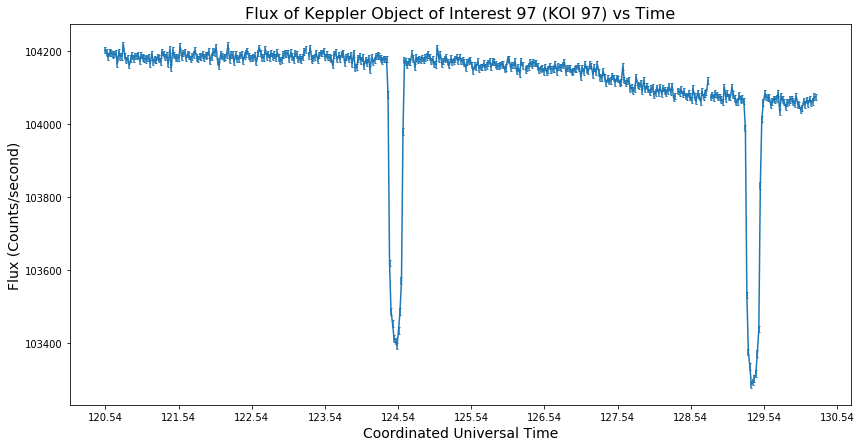

In [2]:
# import data
time, flux, flux_err = np.loadtxt('KOI97.01_1.out', unpack=True)

fig1, ax = plt.subplots(figsize = (14, 7))

ax.errorbar(x = time, y = flux,
            yerr = flux_err, fmt = '-', capsize = 1) # cap size is size of error bars

ax.set_xlabel('Coordinated Universal Time', fontsize = 14)
plt.xticks(np.arange(min(time), max(time)+1, 1.0))
ax.set_ylabel('Flux (Counts/second)', fontsize = 14)
ax.set_title('Flux of Keppler Object of Interest 97 (KOI 97) vs Time', fontsize = 16)

plt.show()

### Problem 2: Extracting data near eclipse, normalizing data and plotting figure with subplots

Text(0.5, 1.0, 'Flux of Keppler Object of Interest 97 (KOI 97) vs Time')

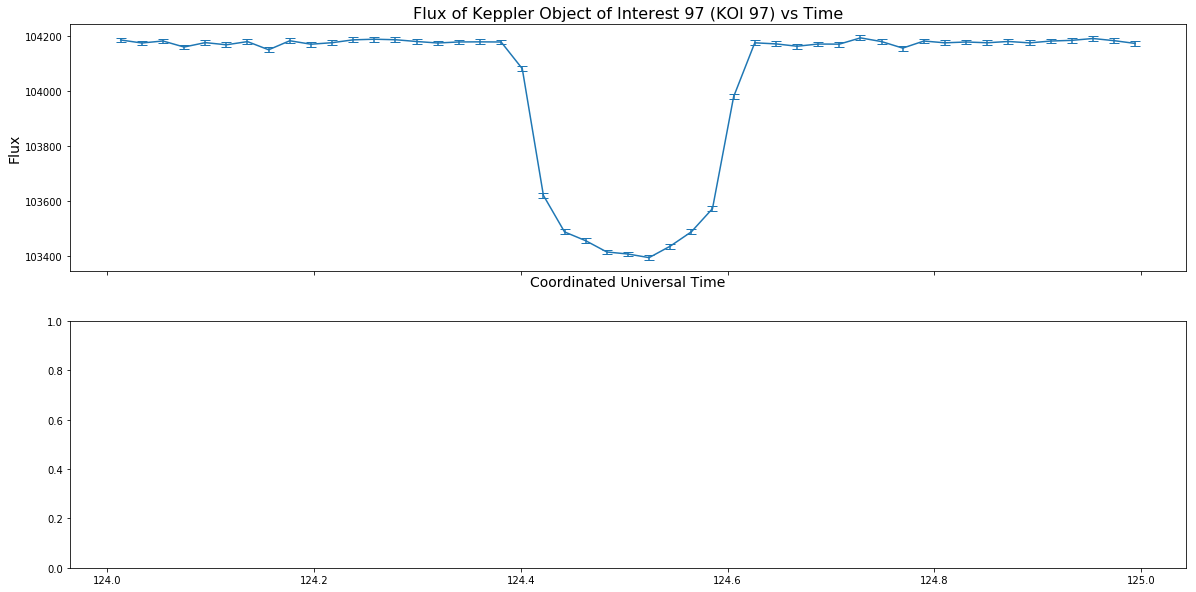

In [3]:
# Extract section that corresponds to a single eclipse (124 <= t <= 125)
eclipse_interval = np.where((time <= 125.0) & (time >= 124.0))

time_eclipse = time[eclipse_interval]
flux_eclipse = flux[eclipse_interval]
flux_err_eclipse = flux_err[eclipse_interval]

# Set up figure with subplots
fig2, (axi, axii) = plt.subplots(2, 1, sharex = True, sharey = False, figsize = (20, 10))

# Plot 1: direct from data
axi.errorbar(x = time_eclipse, y = flux_eclipse,
            yerr = flux_err_eclipse, fmt = '-', capsize = 5)

axi.set_xlabel('Coordinated Universal Time', fontsize = 14)
axi.set_ylabel('Flux', fontsize = 14)
axi.set_title('Flux of Keppler Object of Interest 97 (KOI 97) vs Time', fontsize = 16)

# Plot 1: Flux ratio to fit data


In [4]:
# On top of plot 1: 

param = {'p': 0.2}

# Note: essentially z_fxn normalizes time
def z_fxn(time_eclipse):
    t_0 = 124.56 # t_0 is time of maximal eclipse
    tau = 0.1
    return (time_eclipse - t_0)/tau

#print(z_fxn(time_eclipse))

z = np.vectorize(z_fxn(time_eclipse))

In [5]:
# Part a) Using Flux ratio defined in PSET 1
def kappa0(param):
    return math.acos((param['p']**2 + z**2 - 1)/(2 * param['p'] * z))


TypeError: float() argument must be a string or a number, not 'vectorize'

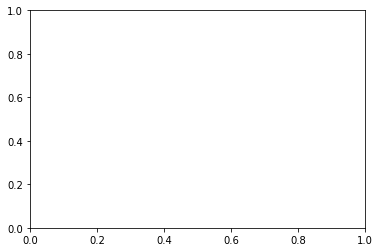

In [6]:
def kappa1(z, param):
    return math.acos((1 - param['p']**2 + z**2)/(2 * z))

def lambd(z, param):
    if 1 + param['p'] < z:
        return 0
    if z <= 1 - param['p']:
        return param['p']**2
    if z <= param['p'] - 1:
        return 1
    arg = (4 * z**2 - (1 + param['z']**2 - param['p']**2)**2)/4
    if arg >= 0:
        return (kappa0(z, param) * param['p']**2 + kappa1(z, param) - math.sqrt(arg))/math.pi
    else:
        return 0

def flux_ratio(z):
    return 1 - lambd(abs(z))

flux_ratio = np.vectorize(flux_ratio)

plt.plot(flux_ratio)

len(time_eclipse)


plt.show()

def I(r):
    mu = math.sqrt(1 - r**2)
    return 1 - (1 - mu)**(3/2)

In [15]:
print(z_fxn)

<function z_fxn at 0x0000020A75658AE8>


In [8]:
len(time)

476

Another way to extract data (slice) for time range

In [6]:
time_eclipse=[]
flux_eclipse=[]
flux_err_eclipse=[]

# Extract section that corresponds to a single eclipse (124 <= t <= 125)
for i in range(0, len(time)):
    if time[i]>=124.0 and time[i]<=125.0:
        time_eclipse.append(time[i])
        flux_eclipse.append(flux[i])
        flux_err_eclipse.append(flux_err[i])


print(time_eclipse)

[124.01321599979565, 124.03365059991484, 124.05408499992336, 124.07451949993265, 124.09495399982552, 124.11538849971112, 124.13582299948757, 124.15625749925675, 124.17669209891756, 124.19712649846042, 124.21756099788763, 124.23799549742398, 124.25842999673478, 124.2788644960383, 124.29929899523268, 124.31973359442782, 124.34016799350502, 124.36060249257571, 124.38103699142084, 124.40147149037512, 124.42190598910383, 124.44234048794897, 124.46277508655476, 124.4832094851663, 124.50364398366219, 124.52407838215731, 124.54451298053027, 124.56494747879333, 124.58538187705562, 124.60581647531217, 124.6262509733424, 124.64668547136534, 124.66711986939481, 124.68755446719297, 124.70798896510678, 124.72842336277972, 124.74885796046146, 124.76929245813517, 124.78972685558256, 124.81016135303071, 124.83059595047962, 124.85103034780332, 124.87146484501864, 124.89189934211754, 124.91233393920993, 124.93276833630807, 124.95320283317415, 124.97363743015012, 124.99407182689902]


## Problem 3: Root Finder

In [5]:
def S_eff(T):
    S = 1.014
    a = (8.177 * 10**-5)
    b = (1.706 * 10**-9)
    return S + (a * T) + (b * T**2)

plt(S_eff(T))

NameError: name 'T' is not defined

In [ ]:
S1 = 1.014
a = (8.177 * 10**-5)
b = (1.706 * 10**-9)

def f(T):
    return (b * T**2) + (a * T) + S1

def df(T):
    return (2 * b * T) + a


def dT(f, T):
    return abs(0-f(T))
 
def newtons_method(f, df, T0, e):
    delta = dT(f, T0)
    while delta > e:
        T0 = T0 - S(T0)/dS(T0)
        delta = dT(S, T0)
    print ('Root is at: ', T0)
    print ('S(T) at root is: ', S(T0))
    
T0s = [0, .5, 1]
for T0 in T0s:
    newtons_method(S, dS, T0, 1e-5)

#T_eff = T + 5780

#def inner_edge(T_eff, S_eff):
    #S_eff = 

ValueError: x, y, and format string must not be None

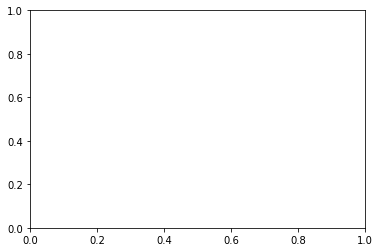

In [7]:
def y1(x):
    np.sin(x)

y = y1(x)
    
x1 = np.linspace(-5, 5, 100)

plt.plot(x1,y)
plt.show()